In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run scraper_v2.ipynb

188
188


# Analysis
Now that all the hard work is done, it is time to plot our data and see whetther the myth of the sophomore slump is true, let's start off by plotting the points per game, rebounds per game, assists per game, net field goal percentage, win shares, and PER per qualified player

In [6]:
PPG=[]
PPG_soph_three=[]
APG=[]
APG_soph_three=[]
RPG=[]
RPG_soph_three=[]
FG=[]
FG_soph_three=[]
WS=[]
WS_soph_three=[]
PER=[]
PER_soph_three=[]
for name in roys.keys():
    if ((len(roys[name])>4) and ((roys[name]['G']>41).all())):
        PPG.append(roys[name]['PTS'][1]-roys[name]['PTS'][0])
        PPG_soph_three.append(roys[name]['PTS'][2:5].mean()-roys[name]['PTS'][1])
        APG.append(roys[name]['AST'][1]-roys[name]['AST'][0])
        APG_soph_three.append(roys[name]['AST'][2:5].mean()-roys[name]['AST'][1])
        RPG.append(roys[name]['TRB'][1]-roys[name]['TRB'][0])
        RPG_soph_three.append(roys[name]['TRB'][2:5].mean()-roys[name]['TRB'][1])
        FG.append(roys[name]['FG%'][1]-roys[name]['FG%'][0])
        FG_soph_three.append(roys[name]['FG%'][2:5].mean()-roys[name]['FG%'][1])
    if ((len(roys[name])>4) and ((roys[name]['G']>41).all())):
        WS.append(roys_adv[name]['WS'][1]-roys_adv[name]['WS'][0])
        WS_soph_three.append(roys_adv[name]['WS'][2:5].mean()-roys_adv[name]['WS'][1])
        PER.append(roys_adv[name]['PER'][1]-roys_adv[name]['PER'][0])
        PER_soph_three.append(roys_adv[name]['PER'][2:5].mean()-roys_adv[name]['PER'][1])

In [ ]:
R_S= [PPG,APG,RPG,FG,WS,PER]
plt_labels={}
plt_labels[0]='PPG'
plt_labels[1]='APG'
plt_labels[2]='RPG'
plt_labels[3]='FG'
plt_labels[4]='WS'
plt_labels[5]='PER'
S_3= [PPG_soph_three,APG_soph_three,RPG_soph_three,FG_soph_three,WS_soph_three,PER_soph_three]

In [ ]:
for index in range(len(R_S)):
    plt.figure(figsize=(8,8))
    plt.scatter(np.arange(0,len(R_S[index])),R_S[index],color='black')
    plt.plot(np.arange(0,len(R_S[index])),np.zeros(len(R_S[index])),c='orange')
    plt.title("Net Diffrential In " + str(plt_labels[index])+ " Between Rookie and Sophomore Seasons")
    pos= np.sum(np.array(R_S[index]) >= 0, axis=0)
    per_pos= pos/len(R_S[index])
    print('The percentage of players that had a net positive ' + str(plt_labels[index]) +' diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

Now, let us investigate the diffrentials across player's sophomore seasons to the next three seasons on average! It seems that in all the per game stats we plotted, a majority of players (>55%) improved from their rookie to sophomore season, now, let us delve into the same previously calculated statistics and investigate 

In [ ]:
for index in range(len(S_3)):
    plt.figure(figsize=(8,8))
    plt.scatter(np.arange(0,len(S_3[index])),S_3[index],color='black')
    plt.plot(np.arange(0,len(S_3[index])),np.zeros(len(S_3[index])),c='orange')
    plt.title("Net Diffrential In " + str(plt_labels[index])+ " Between Sophomore Season and The Next Three Seasons")
    pos= np.sum(np.array(S_3[index]) >= 0, axis=0)
    per_pos= pos/len(S_3[index])
    print('The percentage of players that had a net positive ' + str(plt_labels[index]) +' diffrential between sophomore season and the next three seasons are '+ str(per_pos*100) + '%')

In [7]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.mlab as mlab

In [8]:
std_WS= np.std(WS)
std_WS_2= np.std(WS_soph_three)
std_PER= np.std(PER)
std_PER_2= np.std(PER_soph_three)
mean_WS= np.mean(WS)
mean_WS_2= np.mean(WS_soph_three)
mean_PER= np.mean(PER)
mean_PER_2= np.mean(PER_soph_three)

The mean of the distribution is 1.6055555555555554 with a standard deviation of 2.4958793200487306


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


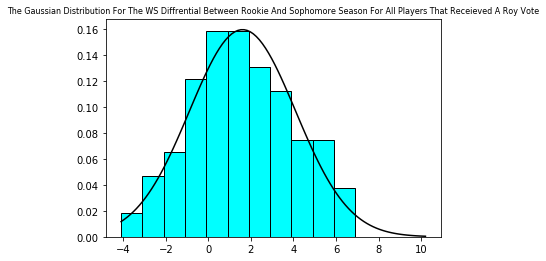

In [52]:
plt.hist(WS, np.arange(min(WS),max(WS)),ec='black',density='True',color='cyan')
plt.plot(np.linspace(np.amin(WS),np.amax(WS)+1,100),mlab.normpdf(np.linspace(np.amin(WS),np.amax(WS)+1,100),mean_WS,std_WS),color='black')

plt.title('The Gaussian Distribution For The WS Diffrential Between Rookie And Sophomore Season For All Players That Receieved A Roy Vote',fontsize=8)
# plt.show()
plt.savefig("g_r_1.PNG",bbox_inches='tight')

print('The mean of the distribution is ' + str(mean_WS) + ' with a standard deviation of ' + str(std_WS))

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


The mean of the distribution is 0.9376543209876543 with a standard deviation of 2.3876055665480784


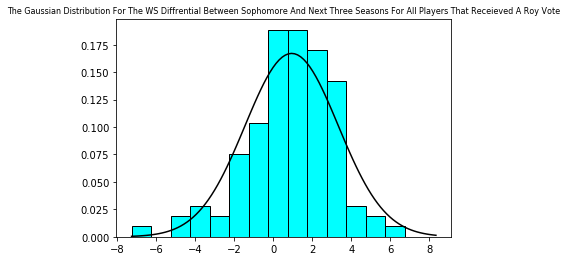

In [53]:
plt.hist(WS_soph_three, np.arange(min(WS_soph_three),max(WS_soph_three)),ec='black',density='True',color='cyan')
plt.plot(np.linspace(np.amin(WS_soph_three),np.amax(WS_soph_three)+1,100),mlab.normpdf(np.linspace(np.amin(WS_soph_three),np.amax(WS_soph_three)+1,100),mean_WS_2,std_WS_2),color='black')
plt.title('The Gaussian Distribution For The WS Diffrential Between Sophomore And Next Three Seasons For All Players That Receieved A Roy Vote',fontsize=8)
# plt.show()
plt.savefig("g_r_2.PNG",bbox_inches='tight')
print('The mean of the distribution is ' + str(mean_WS_2) + ' with a standard deviation of ' + str(std_WS_2))

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


The mean of the distribution is 1.1194444444444445 with a standard deviation of 2.513167483967023


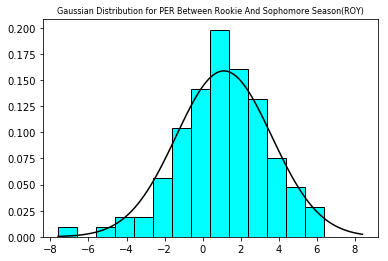

In [115]:
plt.hist(PER, np.arange(min(PER),max(PER)),ec='black',density='True',color='cyan')
plt.plot(np.linspace(np.amin(PER),np.amax(PER)+1,100),mlab.normpdf(np.linspace(np.amin(PER),np.amax(PER)+1,100),mean_PER,std_PER),color='black')
plt.title('Gaussian Distribution for PER Between Rookie And Sophomore Season(ROY)',fontsize=8)
# plt.show()
plt.savefig("g_r_3.PNG",bbox_inches='tight')
print('The mean of the distribution is ' + str(mean_PER) + ' with a standard deviation of ' + str(std_PER))

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


The mean of the distribution is 1.5552469135802467 with a standard deviation of 2.5318228198050385


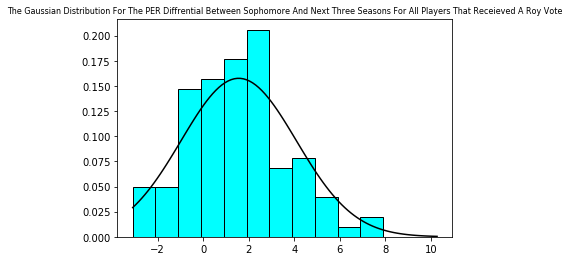

In [55]:
plt.hist(PER, np.arange(min(PER_soph_three),max(PER_soph_three)),ec='black',density='True',color='cyan')
plt.plot(np.linspace(np.amin(PER_soph_three),np.amax(PER_soph_three)+1,100),mlab.normpdf(np.linspace(np.amin(PER_soph_three),np.amax(PER_soph_three)+1,100),mean_PER_2,std_PER_2),color='black')
plt.title('Gaussian Distribution for PER Between Sophomore And Next Three Seasons(ROY)', fontsize=8)
# plt.show()
plt.savefig("g_r_4.PNG",bbox_inches='tight')
print('The mean of the distribution is ' + str(mean_PER_2) + ' with a standard deviation of ' + str(std_PER_2))

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Loca

The percentage of players that had a net positive WS diffrential between rookie and sophomore seasons are 74.07407407407408%


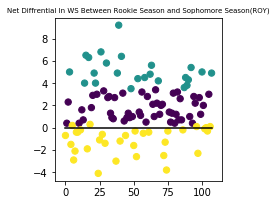

In [111]:
from sklearn.mixture import GMM
WS_1= (np.array(WS)).reshape(-1,1)
gmm = GMM(n_components=3).fit(WS_1)
labels = gmm.predict(WS_1)
pos= np.sum(np.array(WS) >= 0, axis=0)
per_pos= pos/len(WS)
plt.figure(figsize=(3,3))
plt.plot(np.arange(0,len(WS_1)),np.zeros(len(WS_1)),c='black')
plt.scatter(np.arange(0,len(WS_1)),WS_1, c=labels, s=40, cmap='viridis')
plt.title("Net Diffrential In WS Between Rookie Season and Sophomore Season(ROY)",fontsize=7)
# plt.show()
plt.savefig("s_r_1.PNG",bbox_inches='tight')
print('The percentage of players that had a net positive WS diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Loca

The percentage of players that had a net positive WS diffrential between their sophomore and their next three seasons are 67.5925925925926%


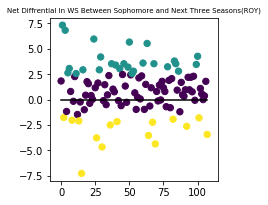

In [112]:
WS_2= (np.array(WS_soph_three)).reshape(-1,1)
gmm = GMM(n_components=3).fit(WS_2)
labels = gmm.predict(WS_2)
pos= np.sum(np.array(WS_soph_three) >= 0, axis=0)
per_pos= pos/len(WS_soph_three)
plt.figure(figsize=(3,3))
plt.plot(np.arange(0,len(WS_2)),np.zeros(len(WS_2)),c='black')
plt.scatter(np.arange(0,len(WS_2)),WS_2, c=labels, s=40, cmap='viridis')
plt.title("Net Diffrential In WS Between Sophomore and Next Three Seasons(ROY)",fontsize=7)
# plt.show()
plt.savefig("s_r_2.PNG",bbox_inches='tight')
print('The percentage of players that had a net positive WS diffrential between their sophomore and their next three seasons are '+ str(per_pos*100) + '%')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Loca

The percentage of players that had a net positive PER diffrential between rookie and sophomore seasons are 69.44444444444444%


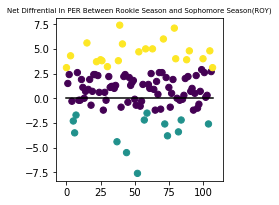

In [113]:
from sklearn.mixture import GMM
PER_1= (np.array(PER)).reshape(-1,1)
gmm = GMM(n_components=3).fit(PER_1)
labels = gmm.predict(PER_1)
pos= np.sum(np.array(PER) >= 0, axis=0)
per_pos= pos/len(PER)
plt.figure(figsize=(3,3))
plt.plot(np.arange(0,len(PER_1)),np.zeros(len(PER_1)),c='black')
plt.scatter(np.arange(0,len(PER_1)),PER_1, c=labels, s=40, cmap='viridis')
plt.title("Net Diffrential In PER Between Rookie Season and Sophomore Season(ROY)",fontsize=7)
# plt.show()
plt.savefig("s_r_3.PNG",bbox_inches='tight')
print('The percentage of players that had a net positive PER diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sumis\AppData\Loca

The percentage of players that had a net positive PER diffrential between their sophomore and their next three seasons are 67.5925925925926%


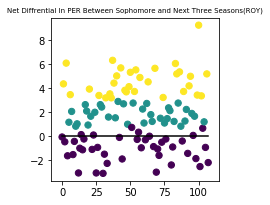

In [114]:
from sklearn.mixture import GMM
PER_2= (np.array(PER_soph_three)).reshape(-1,1)
gmm = GMM(n_components=3).fit(PER_2)
labels = gmm.predict(PER_2)
pos= np.sum(np.array(PER_soph_three) >= 0, axis=0)
per_pos= pos/len(PER_soph_three)
plt.figure(figsize=(3,3))
plt.plot(np.arange(0,len(PER_2)),np.zeros(len(PER_2)),c='black')
plt.scatter(np.arange(0,len(PER_2)),PER_2, c=labels, s=40, cmap='viridis')
plt.title("Net Diffrential In PER Between Sophomore and Next Three Seasons(ROY)",fontsize=7)
# plt.show()
plt.savefig("s_r_4.PNG",bbox_inches='tight')
print('The percentage of players that had a net positive PER diffrential between their sophomore and their next three seasons are '+ str(per_pos*100) + '%')